# Prueba 1
Garay Largo Lucy Marisol

In [9]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Actualizar los datos (URL)

url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
df

,Provincia,16/3/2020,17/3/2020,18/3/2020,19/3/2020,20/3/2020,21/3/2020,22/3/2020,23/3/2020,24/3/2020,...,13/4/2020,14/4/2020,15/4/2020,16/4/2020,17/4/2020,18/4/2020,19/4/2020,20/4/2020,21/04/2020,22/04/2020
0,Azuay,1.0,5.0,5.0,14.0,18.0,19.0,19.0,23.0,28.0,...,182,192,200,205,207,217,223,232,247,273
1,Bolivar,NaN,NaN,2.0,2.0,4.0,5.0,8.0,9.0,9.0,...,33,33,33,39,39,45,49,54,55,59
2,Cañar,NaN,NaN,NaN,3.0,3.0,3.0,4.0,5.0,7.0,...,100,104,105,117,118,125,137,145,149,162
3,Carchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,26,26,26,26,28,33,35,35,35
4,Chimborazo,NaN,NaN,NaN,2.0,3.0,4.0,9.0,9.0,11.0,...,85,86,90,99,105,108,112,116,121,124
5,Cotopaxi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,42,43,45,46,50,51,54,57,57,59
6,El Oro,NaN,1.0,1.0,1.0,2.0,2.0,6.0,9.0,14.0,...,160,166,183,193,207,247,257,266,276,289
7,Esmeraldas,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,3.0,...,38,41,44,53,85,86,89,102,102,104
8,Galápagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,11,12,11,11,42,53,54,54,54,54
9,Guayas,37.0,81.0,128.0,187.0,318.0,397.0,607.0,769.0,826.0,...,5395,5417,5551,5754,5777,6150,6446,6921,7108,7391


In [13]:
#df = df.loc[8,['Provincia']]
inicio='16/3/2020'
df=df[df['Provincia'].isin(['Galápagos'])]

df = df.replace(np.nan, 0)

y=list(df.iloc[0,:])
for i in range(9):
    y.pop(0)
print(y)   


x=list(range(1,len(y)+1))
print(x)

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5, 7, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 42, 53, 54, 54, 54, 54]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


# EL modelo lineal

In [14]:
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [1.61179088]
Independent term: 
 -7.81609195402298


Predicción a 7 días sumando desde el ultimo día en x(30): 51.82017055988134 contagiados


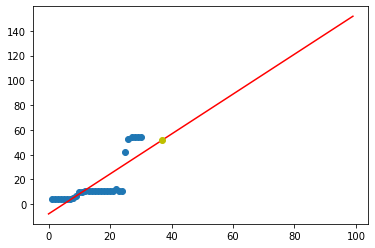

In [15]:
plt.scatter(x, y)
x_real = np.array(range(0,100))
#print(x_real)
puntos=regr.predict(x_real.reshape(-1, 1))
plt.plot(x_real,puntos, color='red')
plt.plot(37,puntos[37],'oy')
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
plt.show()

# El modelo logistico

In [16]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)


(array([-14.8376567 ,  12.86033192]), array([[ 69.35251193, -25.04115386],
       [-25.04115386,  10.06231405]]))


Predicción a 7 días sumando desde el ultimo día en x(30): 31.942908712539502 contagiados


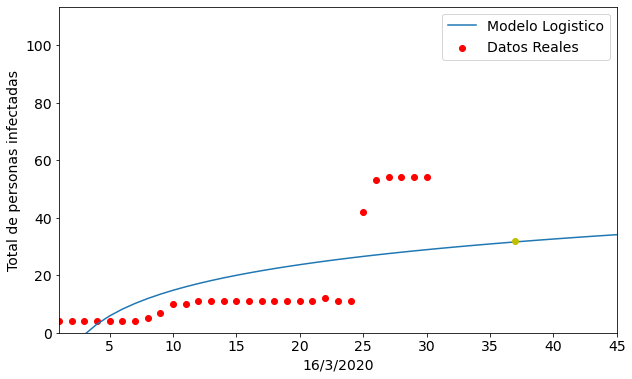

In [17]:
pred_x = list(range(1,100)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
puntos=[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x,puntos , label="Modelo Logistico" )
plt.legend()
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((0,max(y)*2.1))
plt.xlim((min(x),max(x)*1.5)) # Definir los limites de Y
plt.plot(37,puntos[37],'oy')
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
plt.show()

# Modelo exponencial

Predicción a 7 días sumando desde el ultimo día en x(30): 243.78742403751588 contagiados


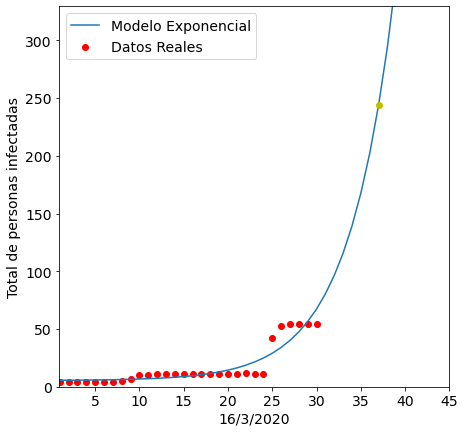

In [18]:
def modelo_exponencial(x,a,b):
    return a+b*np.exp(b*x)

exp_fit = curve_fit(modelo_exponencial,x,y)
#print(exp_fit)

pred_x = list(range(0,max(x)+100))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)


plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
puntos=[modelo_exponencial(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
#print(x)

plt.plot(pred_x,puntos , label="Modelo Exponencial")
plt.legend()
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((0,max(y)*6.1))
plt.xlim((min(x)*0.9,max(x)*1.5))
plt.plot(37,puntos[37], 'oy')
plt.show()

# Modelo polinomial

Predicción a 7 días sumando desde el ultimo día en x(30): 145.92338885409947 contagiados


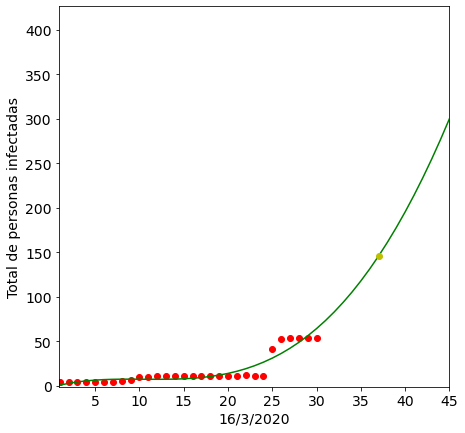

In [19]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 4)    # usaremos polinomios de grado 6
X = pf.fit_transform(np.array(x).reshape(-1, 1))

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, y) 

#print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))



pred_x = list(range(0,max(x)+50))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', prediccion_entrenamiento[37], 'contagiados')

#print( x)

plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.ylim((-1,max(y)*7.9))
plt.xlim((min(x)*0.9,max(x)*1.5))
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.plot(37,prediccion_entrenamiento[37], 'oy')
plt.show()


In [26]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

#df=df.loc[0,:]

class Learner(object):
    def __init__(self, country, loss, start_date,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0

    #def load_confirmed(self, country):
     #   url = 'Casos covid por provincias.xlsx'
     #   df = pd.read_excel('Casos covid por provincias.xlsx')
     #   df= df[df['Provincia'].isin(['Galápagos'])]
       # print(list(df.iloc[0,:]))
        #y=list(df.iloc[0,:])
        #for i in range(9):
         #   y.pop(0)
        #print(y)   

        #return 

    
    def train(self):
        data = y
        #print(data) 
        self.i0=data
        optimal = minimize(loss, [0.001, 0.001], args=(data, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.26), (0.00000001, 0.163)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        #new_index, extended_actual = (beta, gamma, data, self.country, self.s_0, self.i_0, self.r_0)
        #df = pd.DataFrame({'Infectados': extended_actual, 'Susceptibles': prediction.y[0], 'Recuperados': prediction.y[2]}, index=new_index)
        #fig, ax = plt.subplots(figsize=(12, 7))
        #x.set_title(self.country)
        #df.plot(ax=ax)
        print(f"\n beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")
        



def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

N=25000
i0=54
r0=0
s0=N - i0 - r0
print('S0:',s0,'\tI0:',i0,'\tR0:',r0)
learner = Learner('Galápagos', loss, '3/16/2020', s0, i0, r0)
learner.train()

S0: 24946 	I0: 54 	R0: 0

 beta=0.26000000, gamma=0.16300000, R0:1.59509202


In [27]:
r_E=1.59509202*N
print(r_E)

39877.300500000005


In [ ]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
Dias=7
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE =1.59509202# Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = Dias*25 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 45 #Numero de filas
nb_cols = 45 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

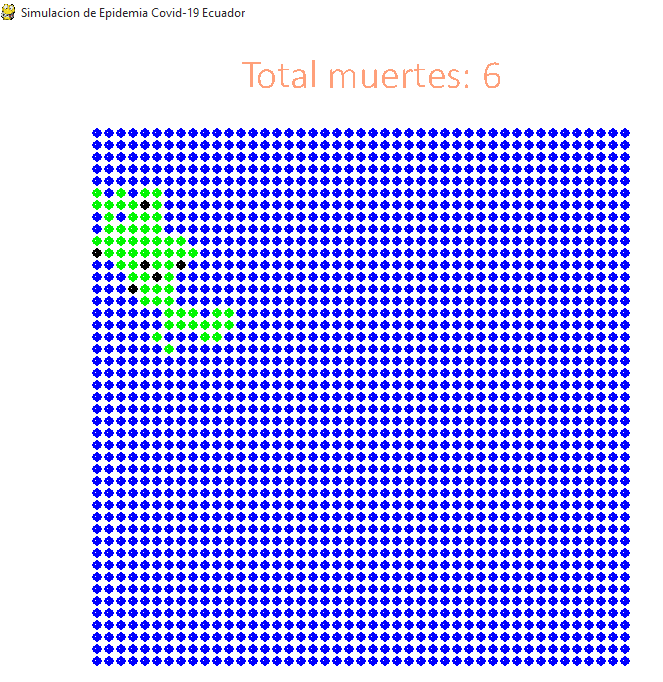

**Cual tiene una mejor prediccion**<br>
De los modelos matematicos el mejor modelo o se acopla de mejor manera de los dats de Galápagos es polinomial, según las preducciones y según la tasa de contagio esta bien a como a ido creciendo estos días. 
<br>
**Ventajas y desventajas de los modelos**
<br>

***Ventajas***
<br>
Nos permiten predecir  como va creciento la tasa de contagiados en esta Proviencia.
Requieren menos tiempo y es menos caro que experimentar con el objeto o la situación real.
Permiten una identificación rápida de las expectativas esperadas
Reducen los riesgos asociados con la experimentación real
<br>

***Desventajas*** 
<br>
Por el número de contagiados y tomando en cuenta que no son datos precisos no se puede tener una precision a futuro correcta.
Se pierde información (que puede ser relevante) del fenómeno que se esta estudiando.
Las diferentes interpretaciones de la información, pueden ocasionar resultados que estén lejos de la realidad.
La recolección de datos puede ser muy costosa y complicada.
Sensibilidad ante errores de medición; a veces pequeñas variaciones en los datos ocasionan que se tengan resultados opuestos.
